# 7. Model Preparation

In [205]:
from datetime import datetime
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import io
from nbformat import read, NO_CONVERT
import warnings
warnings.filterwarnings("ignore")

In [206]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [207]:
# Load the data
df = pd.read_csv('Process_data.csv')

In [208]:
# Inspect Data
df.head()

,category,close_date,currency,funds_raised_amount,funds_raised_percent,is_indemand,is_pre_launch,open_date,perk_goal_percentage,perks_claimed,...,"Podcasts, Blogs & Vlogs",Productivity,Spirituality,Tabletop Games,Transportation,Travel & Outdoors,Video Games,Web Series & TV Shows,Wellness,Writing & Publishing
0,Film,2020-02-02 07:59:59+00:00,USD,405,0.202500,False,False,2020-01-02 08:00:00+00:00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Food & Beverages,2012-10-29 06:59:59+00:00,USD,625,0.010870,False,False,2012-08-29 19:58:06+00:00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Local Businesses,2015-02-08 07:59:59+00:00,USD,1790,0.795556,False,False,2014-12-19 12:13:16+00:00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,Film,2019-02-09 07:59:59+00:00,USD,5425,1.085000,False,False,2018-12-10 08:00:00+00:00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Health & Fitness,2012-12-28 07:59:59+00:00,USD,70,0.007000,False,False,2012-11-28 15:02:30+00:00,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65487 entries, 0 to 65486
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   category                    65487 non-null  object 
 1   close_date                  65487 non-null  object 
 2   currency                    65487 non-null  object 
 3   funds_raised_amount         65487 non-null  int64  
 4   funds_raised_percent        65487 non-null  float64
 5   is_indemand                 65487 non-null  bool   
 6   is_pre_launch               65487 non-null  bool   
 7   open_date                   65487 non-null  object 
 8   perk_goal_percentage        65487 non-null  float64
 9   perks_claimed               65487 non-null  float64
 10  product_stage               65487 non-null  object 
 11  project_id                  65487 non-null  int64  
 12  project_type                65487 non-null  object 
 13  tagline                     654

In [210]:
# Drop Column
df.drop('category', axis=1, inplace=True)
df.drop('close_date', axis=1, inplace=True)
df.drop('currency', axis=1, inplace=True)
df.drop('funds_raised_amount', axis=1, inplace=True)
df.drop('funds_raised_percent', axis=1, inplace=True)
df.drop('is_pre_launch', axis=1, inplace=True)
df.drop('open_date', axis=1, inplace=True)
df.drop('perk_goal_percentage', axis=1, inplace=True)

df.drop('perks_claimed', axis=1, inplace=True)
df.drop('product_stage', axis=1, inplace=True)
df.drop('project_id', axis=1, inplace=True)
df.drop('project_type', axis=1, inplace=True)
df.drop('tagline', axis=1, inplace=True)
df.drop('tags', axis=1, inplace=True)
df.drop('title', axis=1, inplace=True)
df.drop('Currency_Name', axis=1, inplace=True)

df.drop('USD per unit', axis=1, inplace=True)
df.drop('status', axis=1, inplace=True)
df.drop('velocity', axis=1, inplace=True)
df.drop('exp_velocity', axis=1, inplace=True)

df.drop('open_year_month', axis=1, inplace=True)
df.drop('close_year', axis=1, inplace=True)
df.drop('close_year_month', axis=1, inplace=True)

df.drop('negative_sentiment_title', axis=1, inplace=True)
df.drop('neutral_sentiment_title', axis=1, inplace=True)
df.drop('positive_sentiment_title', axis=1, inplace=True)
df.drop('SylCnt_title', axis=1, inplace=True)
df.drop('WordCnt_title', axis=1, inplace=True)
df.drop('negative_sentiment_tagline', axis=1, inplace=True)
df.drop('neutral_sentiment_tagline', axis=1, inplace=True)
df.drop('positive_sentiment_tagline', axis=1, inplace=True)

df.drop('emotional_title', axis=1, inplace=True)
df.drop('emotional_tagline', axis=1, inplace=True)

df.drop('SylCnt_tagline', axis=1, inplace=True)
df.drop('WordCnt_tagline', axis=1, inplace=True)


In [211]:
# Renaming a single column:
df.rename(columns={'Status_Boo': 'status'}, inplace=True)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65487 entries, 0 to 65486
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   is_indemand                 65487 non-null  bool   
 1   is_proven                   65487 non-null  bool   
 2   funds_raised_amount_USD     65487 non-null  float64
 3   status                      65487 non-null  int64  
 4   goal                        65487 non-null  float64
 5   duration                    65487 non-null  int64  
 6   open_year                   65487 non-null  int64  
 7   compound_sentiment_title    65487 non-null  float64
 8   emotional_score_title       65487 non-null  float64
 9   UpperCnt                    65487 non-null  int64  
 10  syl_per_word_title          65487 non-null  float64
 11  FREScore_title              65487 non-null  float64
 12  ColScore_title              65487 non-null  float64
 13  compound_sentiment_tagline  654

In [213]:
# Find columns containing NaN values and their counts
nan_counts = df.isna().sum()

print("NaN counts in each column:")
print(nan_counts)

NaN counts in each column:
is_indemand                   0
is_proven                     0
funds_raised_amount_USD       0
status                        0
goal                          0
duration                      0
open_year                     0
compound_sentiment_title      0
emotional_score_title         0
UpperCnt                      0
syl_per_word_title            0
FREScore_title                0
ColScore_title                0
compound_sentiment_tagline    0
emotional_score_tagline       0
syl_per_word_tagline          0
FREScore_tagline              0
ColScore_tagline              0
Non Specify                   0
concept                       0
production                    0
prototype                     0
shipping                      0
Animal Rights                 0
Art                           0
Audio                         0
Camera Gear                   0
Comics                        0
Culture                       0
Dance & Theater               0
Education    

## 7.1 RobustScaler Transformation

In [214]:
from sklearn.preprocessing import RobustScaler

### Goal Column

In [215]:
# Convert 'goal' column to numeric
df['goal'] = pd.to_numeric(df['goal'], errors='coerce')

In [216]:
df.dropna(subset=['goal'], inplace=True)

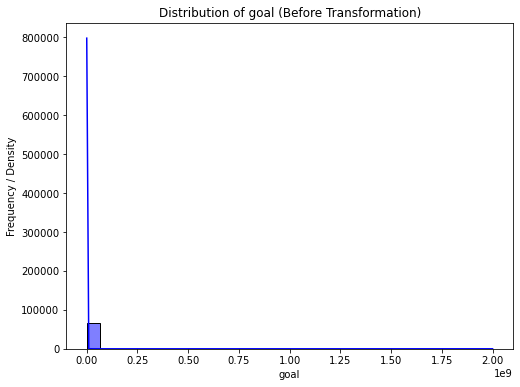

In [217]:
# Assuming 'goal' is the column you want to plot
column_to_plot = 'goal'

# Drop non-finite values (NaN and infinite) from the 'goal' column
data = df[column_to_plot].replace([np.inf, -np.inf], np.nan).dropna()

# Plot histogram with trend line (KDE)
plt.figure(figsize=(8, 6))
sns.histplot(data, bins=30, kde=True, color='blue', edgecolor='black')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency / Density')
plt.title(f'Distribution of {column_to_plot} (Before Transformation)')
plt.show()

In [218]:
df['goal'].describe()

count    6.548700e+04
mean              inf
std               NaN
min      0.000000e+00
25%      2.124705e+03
50%      6.460724e+03
75%      2.000000e+04
max               inf
Name: goal, dtype: float64

In [219]:
# Assuming 'goal' is the column you want to check for skewness
column_to_check = 'goal'

# Calculate skewness
skewness = df[column_to_check].skew()

print(f'Skewness of {column_to_check}: {skewness}')

Skewness of goal: nan


In [220]:
'''# define column
column_to_transform = 'goal'

# Remove non-positive values (e.g., zeros) and non-finite values (NaN and infinite) from the 'goal' column
data = df[column_to_transform].replace([0, np.inf, -np.inf], np.nan).dropna()

# Apply log transformation
transformed_data = np.log(data)

# Update the 'goal' column with the transformed values
df['goal_log'] = transformed_data'''

"# define column\ncolumn_to_transform = 'goal'\n\n# Remove non-positive values (e.g., zeros) and non-finite values (NaN and infinite) from the 'goal' column\ndata = df[column_to_transform].replace([0, np.inf, -np.inf], np.nan).dropna()\n\n# Apply log transformation\ntransformed_data = np.log(data)\n\n# Update the 'goal' column with the transformed values\ndf['goal_log'] = transformed_data"

In [221]:
# Assuming df is your DataFrame and 'goal' is the column you want to transform
column_to_transform = 'goal'

# Filter out non-positive values (e.g., zeros) and infinity from the 'goal' column
data = df[df[column_to_transform] > 0][column_to_transform].copy()

# Apply log transformation to the 'goal' column and replace very large values with NaN
data_log = np.log(data.replace(np.inf, np.nan))

# Create a RobustScaler object
scaler = RobustScaler()

# Fit the scaler to the log-transformed data and then transform the data
robust_scaled_data = scaler.fit_transform(data_log.dropna().values.reshape(-1, 1))

# Update the DataFrame with the Robust Scaled values
df['goal_robust_scaled'] = np.nan
df.loc[data_log.dropna().index, 'goal_robust_scaled'] = robust_scaled_data

# Display the updated DataFrame
print(df)

       is_indemand  is_proven  funds_raised_amount_USD  status          goal  \
0            False      False               405.000000       0   2000.000000   
1            False      False               625.000000       0  57500.000002   
2            False      False              1790.000000       0   2250.000000   
3            False      False              5425.000000       1   5000.000000   
4            False      False                70.000000       0  10000.000000   
...            ...        ...                      ...     ...           ...   
65482        False      False                35.660556       0    998.495564   
65483        False      False                 0.000000       0      0.000000   
65484        False      False                 0.000000       0      0.000000   
65485        False      False              7808.710787       0  17830.277934   
65486        False      False                14.858565       0  20623.688146   

       duration  open_year  compound_se

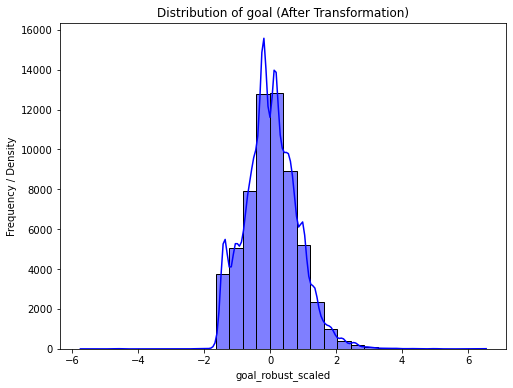

In [222]:
# Assuming 'goal' is the column you applied the log transformation
column_to_plot = 'goal_robust_scaled'

# Plot histogram with trend line (KDE)
plt.figure(figsize=(8, 6))
sns.histplot(df[column_to_plot], bins=30, kde=True, color='blue', edgecolor='black')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency / Density')
plt.title(f'Distribution of goal (After Transformation)')
plt.show()

In [223]:
# Assuming 'goal' is the column you want to check for skewness
column_to_check = 'goal_robust_scaled'

# Calculate skewness
skewness = df[column_to_check].skew()

print(f'Skewness of {column_to_check}: {skewness}')

Skewness of goal_robust_scaled: 0.47152346148526214


### funds_raised_amount_USD

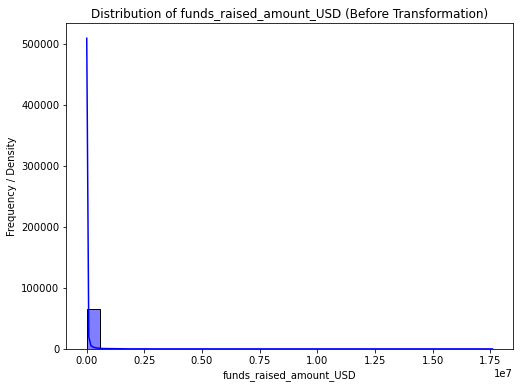

In [224]:
# Assuming 'goal' is the column you want to plot
column_to_plot = 'funds_raised_amount_USD'

# Drop non-finite values (NaN and infinite) from the 'goal' column
data = df[column_to_plot].replace([np.inf, -np.inf], np.nan).dropna()

# Plot histogram with trend line (KDE)
plt.figure(figsize=(8, 6))
sns.histplot(data, bins=30, kde=True, color='blue', edgecolor='black')
plt.xlabel(column_to_plot)
plt.ylabel('Frequency / Density')
plt.title(f'Distribution of {column_to_plot} (Before Transformation)')
plt.show()

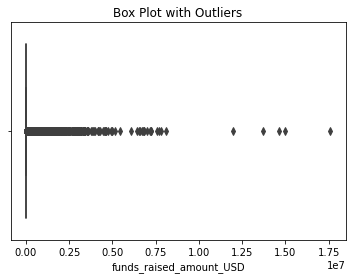

In [225]:
# Plot the box plot using Seaborn
sns.boxplot(x=df['funds_raised_amount_USD'])

# Add title and labels
plt.title('Box Plot with Outliers')
plt.xlabel('funds_raised_amount_USD')

# Show the plot
plt.show()

In [226]:
column_to_check1 = 'funds_raised_amount_USD'

# Calculate skewness
skewness = df[column_to_check1].skew()

print(f'Skewness of {column_to_check1}: {skewness}')

Skewness of funds_raised_amount_USD: 27.08792817205608


In [227]:
# Assuming df is your DataFrame and 'goal' is the column you want to transform
column_to_transform = 'funds_raised_amount_USD'

# Filter out non-positive values (e.g., zeros) and infinity from the 'goal' column
data = df[df[column_to_transform] > 0][column_to_transform].copy()

# Apply log transformation to the 'goal' column and replace very large values with NaN
data_log = np.log(data.replace(np.inf, np.nan))

# Create a RobustScaler object
scaler = RobustScaler()

# Fit the scaler to the log-transformed data and then transform the data
robust_scaled_data = scaler.fit_transform(data_log.dropna().values.reshape(-1, 1))

# Update the DataFrame with the Robust Scaled values
df['funds_raised_amount_USD_robust_scaled'] = np.nan
df.loc[data_log.dropna().index, 'funds_raised_amount_USD_robust_scaled'] = robust_scaled_data

# Display the updated DataFrame
print(df)

       is_indemand  is_proven  funds_raised_amount_USD  status          goal  \
0            False      False               405.000000       0   2000.000000   
1            False      False               625.000000       0  57500.000002   
2            False      False              1790.000000       0   2250.000000   
3            False      False              5425.000000       1   5000.000000   
4            False      False                70.000000       0  10000.000000   
...            ...        ...                      ...     ...           ...   
65482        False      False                35.660556       0    998.495564   
65483        False      False                 0.000000       0      0.000000   
65484        False      False                 0.000000       0      0.000000   
65485        False      False              7808.710787       0  17830.277934   
65486        False      False                14.858565       0  20623.688146   

       duration  open_year  compound_se

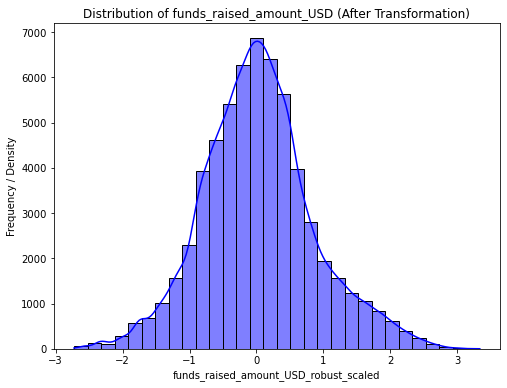

In [228]:
# Assuming 'goal' is the column you applied the log transformation
column_to_plot4 = 'funds_raised_amount_USD_robust_scaled'

# Plot histogram with trend line (KDE)
plt.figure(figsize=(8, 6))
sns.histplot(df[column_to_plot4], bins=30, kde=True, color='blue', edgecolor='black')
plt.xlabel(column_to_plot4)
plt.ylabel('Frequency / Density')
plt.title(f'Distribution of {column_to_plot} (After Transformation)')
plt.show()

In [229]:
column_to_check1 = 'funds_raised_amount_USD_robust_scaled'

# Calculate skewness
skewness = df[column_to_check1].skew()

print(f'Skewness of {column_to_check1}: {skewness}')

Skewness of funds_raised_amount_USD_robust_scaled: 0.2645736632806536


### Duration

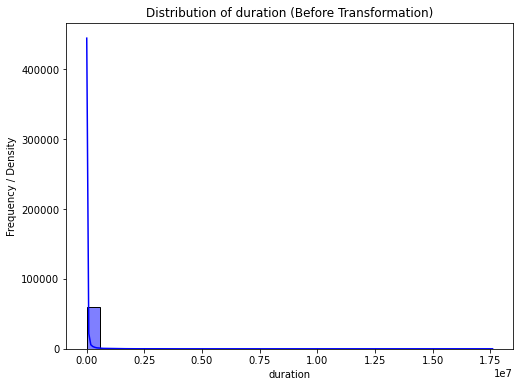

In [230]:
# Define Column
column_to_plot1 = 'duration'

# Plot histogram with trend line (KDE)
plt.figure(figsize=(8, 6))
sns.histplot(data, bins=30, kde=True, color='blue', edgecolor='black')
plt.xlabel(column_to_plot1)
plt.ylabel('Frequency / Density')
plt.title(f'Distribution of {column_to_plot1} (Before Transformation)')
plt.show()

In [231]:
column_to_check2 = 'duration'

# Calculate skewness
skewness = df[column_to_check2].skew()

print(f'Skewness of {column_to_check1}: {skewness}')

Skewness of funds_raised_amount_USD_robust_scaled: 2.678965772611533


In [232]:
# Assuming df is your DataFrame and 'goal' is the column you want to transform
column_to_transform = 'duration'

# Filter out non-positive values (e.g., zeros) and infinity from the 'goal' column
data = df[df[column_to_transform] > 0][column_to_transform].copy()

# Apply log transformation to the 'goal' column and replace very large values with NaN
data_log = np.log(data.replace(np.inf, np.nan))

# Create a RobustScaler object
scaler = RobustScaler()

# Fit the scaler to the log-transformed data and then transform the data
robust_scaled_data = scaler.fit_transform(data_log.dropna().values.reshape(-1, 1))

# Update the DataFrame with the Robust Scaled values
df['duration_robust_scaled'] = np.nan
df.loc[data_log.dropna().index, 'duration_robust_scaled'] = robust_scaled_data

# Display the updated DataFrame
print(df)

       is_indemand  is_proven  funds_raised_amount_USD  status          goal  \
0            False      False               405.000000       0   2000.000000   
1            False      False               625.000000       0  57500.000002   
2            False      False              1790.000000       0   2250.000000   
3            False      False              5425.000000       1   5000.000000   
4            False      False                70.000000       0  10000.000000   
...            ...        ...                      ...     ...           ...   
65482        False      False                35.660556       0    998.495564   
65483        False      False                 0.000000       0      0.000000   
65484        False      False                 0.000000       0      0.000000   
65485        False      False              7808.710787       0  17830.277934   
65486        False      False                14.858565       0  20623.688146   

       duration  open_year  compound_se

In [233]:
# Check for NaN values in the 'duration_log' column
has_nan = df['duration_robust_scaled'].isna().any()

# Output the result
print(has_nan)

True


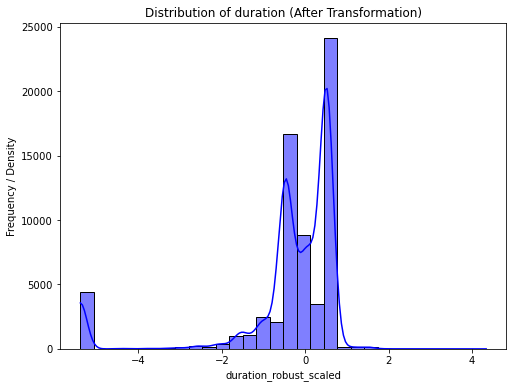

In [234]:
# Assuming 'goal' is the column you applied the log transformation
column_to_plot4 = 'duration_robust_scaled'

# Plot histogram with trend line (KDE)
plt.figure(figsize=(8, 6))
sns.histplot(df[column_to_plot4], bins=30, kde=True, color='blue', edgecolor='black')
plt.xlabel(column_to_plot4)
plt.ylabel('Frequency / Density')
plt.title(f'Distribution of {column_to_plot1} (After Transformation)')
plt.show()

In [235]:
column_to_check2 = 'duration_robust_scaled'

# Calculate skewness
skewness = df[column_to_check2].skew()

print(f'Skewness of {column_to_check1}: {skewness}')

Skewness of funds_raised_amount_USD_robust_scaled: -2.5384499208117055


### UpperCnt

In [236]:
'''# Define Column
column_to_plot1 = 'UpperCnt'

# Plot histogram with trend line (KDE)
plt.figure(figsize=(8, 6))
sns.histplot(data, bins=30, kde=True, color='blue', edgecolor='black')
plt.xlabel(column_to_plot1)
plt.ylabel('Frequency / Density')
plt.title(f'Histogram of {column_to_plot1} (Before Log Transformation) with Trend Line (KDE)')'''
plt.show()

In [237]:
'''column_to_check2 = 'UpperCnt'

# Calculate skewness
skewness = df[column_to_check2].skew()

print(f'Skewness of {column_to_check1}: {skewness}')'''

"column_to_check2 = 'UpperCnt'\n\n# Calculate skewness\nskewness = df[column_to_check2].skew()\n\nprint(f'Skewness of {column_to_check1}: {skewness}')"

In [238]:
'''# define column
column_to_transform = 'UpperCnt'

# Remove non-positive values (e.g., zeros) and non-finite values (NaN and infinite) from the 'goal' column
data = df[column_to_transform].replace([0, np.inf, -np.inf], np.nan).dropna()

# Apply log transformation
transformed_data = np.log(data)

# Update the 'goal' column with the transformed values
df['UpperCnt_log'] = transformed_data'''

"# define column\ncolumn_to_transform = 'UpperCnt'\n\n# Remove non-positive values (e.g., zeros) and non-finite values (NaN and infinite) from the 'goal' column\ndata = df[column_to_transform].replace([0, np.inf, -np.inf], np.nan).dropna()\n\n# Apply log transformation\ntransformed_data = np.log(data)\n\n# Update the 'goal' column with the transformed values\ndf['UpperCnt_log'] = transformed_data"

In [239]:
'''# Assuming 'goal' is the column you applied the log transformation
column_to_plot4 = 'UpperCnt_log'

# Plot histogram with trend line (KDE)
plt.figure(figsize=(8, 6))
sns.histplot(df[column_to_plot4], bins=30, kde=True, color='blue', edgecolor='black')
plt.xlabel(column_to_plot4)
plt.ylabel('Frequency / Density')
plt.title(f'Histogram of {column_to_plot4} (After Log Transformation) with Trend Line (KDE)')
plt.show()'''

"# Assuming 'goal' is the column you applied the log transformation\ncolumn_to_plot4 = 'UpperCnt_log'\n\n# Plot histogram with trend line (KDE)\nplt.figure(figsize=(8, 6))\nsns.histplot(df[column_to_plot4], bins=30, kde=True, color='blue', edgecolor='black')\nplt.xlabel(column_to_plot4)\nplt.ylabel('Frequency / Density')\nplt.title(f'Histogram of {column_to_plot4} (After Log Transformation) with Trend Line (KDE)')\nplt.show()"

In [240]:
'''column_to_check2 = 'UpperCnt_log'

# Calculate skewness
skewness = df[column_to_check2].skew()

print(f'Skewness of {column_to_check2}: {skewness}')'''

"column_to_check2 = 'UpperCnt_log'\n\n# Calculate skewness\nskewness = df[column_to_check2].skew()\n\nprint(f'Skewness of {column_to_check2}: {skewness}')"

## 7.2 Log Transformation

### syl_per_word_title

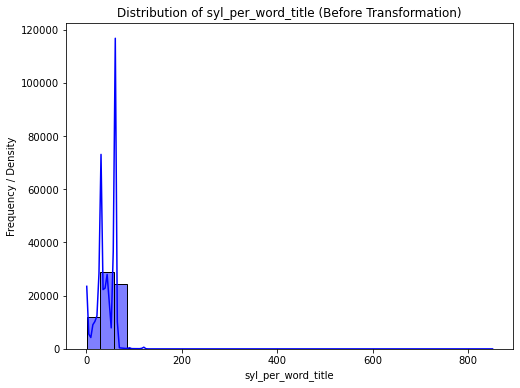

In [241]:
# Define Column
column_to_plot1 = 'syl_per_word_title'

# Plot histogram with trend line (KDE)
plt.figure(figsize=(8, 6))
sns.histplot(data, bins=30, kde=True, color='blue', edgecolor='black')
plt.xlabel(column_to_plot1)
plt.ylabel('Frequency / Density')
plt.title(f'Distribution of {column_to_plot1} (Before Transformation)')
plt.show()

In [242]:
column_to_check2 = 'syl_per_word_title'

# Calculate skewness
skewness = df[column_to_check2].skew()

print(f'Skewness of {column_to_check1}: {skewness}')

Skewness of funds_raised_amount_USD_robust_scaled: 2.5806319712021417


In [243]:
# define column
column_to_transform = 'syl_per_word_title'

# Remove non-positive values (e.g., zeros) and non-finite values (NaN and infinite) from the 'goal' column
data = df[column_to_transform].replace([0, np.inf, -np.inf], np.nan).dropna()

# Apply log transformation
transformed_data = np.log(data)

# Update the 'goal' column with the transformed values
df['syl_per_word_title_log'] = transformed_data

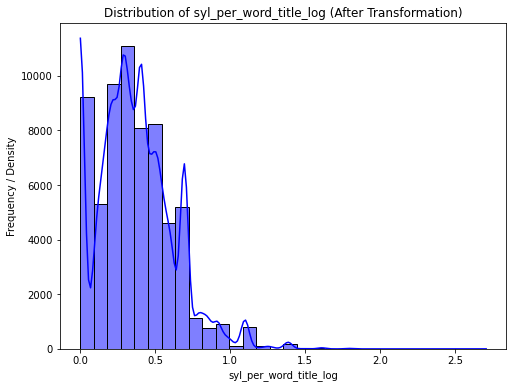

In [244]:
# Assuming 'goal' is the column you applied the log transformation
column_to_plot4 = 'syl_per_word_title_log'

# Plot histogram with trend line (KDE)
plt.figure(figsize=(8, 6))
sns.histplot(df[column_to_plot4], bins=30, kde=True, color='blue', edgecolor='black')
plt.xlabel(column_to_plot4)
plt.ylabel('Frequency / Density')
plt.title(f'Distribution of {column_to_plot4} (After Transformation)')
plt.show()

In [245]:
column_to_check2 = 'syl_per_word_title_log'

# Calculate skewness
skewness = df[column_to_check2].skew()

print(f'Skewness of {column_to_check2}: {skewness}')

Skewness of syl_per_word_title_log: 0.771786809149145


### syl_per_word_tagline

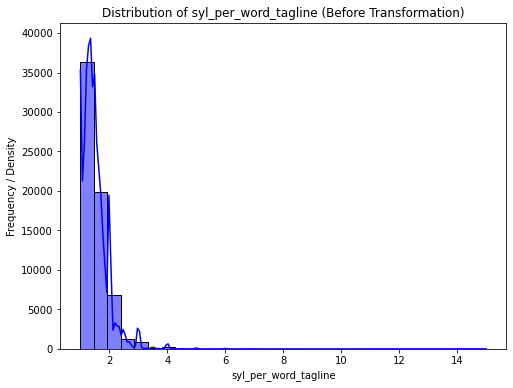

In [246]:
# Define Column
column_to_plot1 = 'syl_per_word_tagline'

# Plot histogram with trend line (KDE)
plt.figure(figsize=(8, 6))
sns.histplot(data, bins=30, kde=True, color='blue', edgecolor='black')
plt.xlabel(column_to_plot1)
plt.ylabel('Frequency / Density')
plt.title(f'Distribution of {column_to_plot1} (Before Transformation)')
plt.show()

In [247]:
column_to_check2 = 'syl_per_word_tagline'

# Calculate skewness
skewness = df[column_to_check2].skew()

print(f'Skewness of {column_to_check1}: {skewness}')

Skewness of funds_raised_amount_USD_robust_scaled: 2.718412310048305


In [248]:
# define column
column_to_transform = 'syl_per_word_tagline'

# Remove non-positive values (e.g., zeros) and non-finite values (NaN and infinite) from the 'goal' column
data = df[column_to_transform].replace([0, np.inf, -np.inf], np.nan).dropna()

# Apply log transformation
transformed_data = np.log(data)

# Update the 'goal' column with the transformed values
df['syl_per_word_tagline_log'] = transformed_data

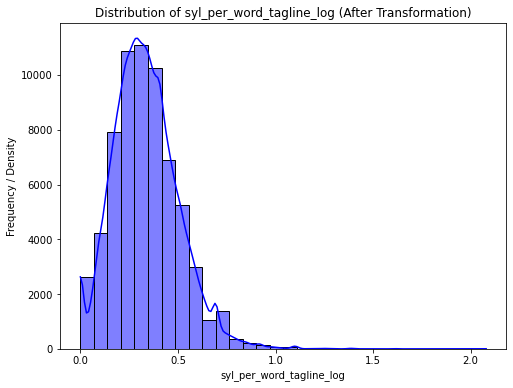

In [249]:
# Assuming 'goal' is the column you applied the log transformation
column_to_plot4 = 'syl_per_word_tagline_log'

# Plot histogram with trend line (KDE)
plt.figure(figsize=(8, 6))
sns.histplot(df[column_to_plot4], bins=30, kde=True, color='blue', edgecolor='black')
plt.xlabel(column_to_plot4)
plt.ylabel('Frequency / Density')
plt.title(f'Distribution of {column_to_plot4} (After Transformation)')
plt.show()

In [250]:
column_to_check2 = 'syl_per_word_tagline_log'

# Calculate skewness
skewness = df[column_to_check2].skew()

print(f'Skewness of {column_to_check2}: {skewness}')

Skewness of syl_per_word_tagline_log: 0.7407430360984409


In [251]:
# Drop rows containing NaN values
df = df.dropna()

In [252]:
# Find columns containing NaN values and their counts
nan_counts = df.isna().sum()

print("NaN counts in each column:")
print(nan_counts)

NaN counts in each column:
is_indemand                              0
is_proven                                0
funds_raised_amount_USD                  0
status                                   0
goal                                     0
duration                                 0
open_year                                0
compound_sentiment_title                 0
emotional_score_title                    0
UpperCnt                                 0
syl_per_word_title                       0
FREScore_title                           0
ColScore_title                           0
compound_sentiment_tagline               0
emotional_score_tagline                  0
syl_per_word_tagline                     0
FREScore_tagline                         0
ColScore_tagline                         0
Non Specify                              0
concept                                  0
production                               0
prototype                                0
shipping                   

In [253]:
# Drop Column
df.drop('is_indemand', axis=1, inplace=True)
df.drop('goal', axis=1, inplace=True)
df.drop('duration', axis=1, inplace=True)
df.drop('syl_per_word_title', axis=1, inplace=True)
df.drop('syl_per_word_tagline', axis=1, inplace=True)
df.drop('funds_raised_amount_USD', axis=1, inplace=True)
df.drop('ColScore_title', axis=1, inplace=True)
df.drop('ColScore_tagline', axis=1, inplace=True)
df.drop('funds_raised_amount_USD_robust_scaled', axis=1, inplace=True)

'''#df.drop('compound_sentiment_title', axis=1, inplace=True)"
df.drop('emotional_score_title', axis=1, inplace=True)
df.drop('FREScore_title', axis=1, inplace=True)
funds_raised_amount_USD_robust_scaled

#df.drop('compound_sentiment_tagline', axis=1, inplace=True)
df.drop('emotional_score_tagline', axis=1, inplace=True)
df.drop('FREScore_tagline', axis=1, inplace=True)
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60651 entries, 0 to 65486
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   is_proven                   60651 non-null  bool   
 1   status                      60651 non-null  int64  
 2   open_year                   60651 non-null  int64  
 3   compound_sentiment_title    60651 non-null  float64
 4   emotional_score_title       60651 non-null  float64
 5   UpperCnt                    60651 non-null  int64  
 6   FREScore_title              60651 non-null  float64
 7   compound_sentiment_tagline  60651 non-null  float64
 8   emotional_score_tagline     60651 non-null  float64
 9   FREScore_tagline            60651 non-null  float64
 10  Non Specify                 60651 non-null  int64  
 11  concept                     60651 non-null  int64  
 12  production                  60651 non-null  int64  
 13  prototype                   606

## 7.3 Balancing the data

In [254]:
import pandas as pd
from sklearn.utils import resample

In [255]:
# Check Target Variable in 2020
filtered_df2020 = df[df['open_year'] == 2020]
tv = filtered_df2020['status'].value_counts()
print(tv)
print(tv[1]/(tv[1]+tv[0]))

0    6099
1    3257
Name: status, dtype: int64
0.34811885421120137


In [256]:
# Check Target Variable in 2021
filtered_df2021 = df[df['open_year'] == 2021]
tv = filtered_df2021['status'].value_counts()
print(tv)
print(tv[1]/(tv[1]+tv[0]))

0    6351
1    2961
Name: status, dtype: int64
0.3179768041237113


In [257]:
# Check Target Variable in 2022
filtered_df2022 = df[df['open_year'] == 2022]
tv = filtered_df2022['status'].value_counts()
print(tv)
print(tv[1]/(tv[1]+tv[0]))

0    6005
1    2092
Name: status, dtype: int64
0.25836729652957885


### Up Sampling "Success" in 2020

In [258]:
# Up Sampling "Success" in 2020

# Separate the two classes
fail_df2020 = filtered_df2020[filtered_df2020['status'] == 0]
success_df2020 = filtered_df2020[filtered_df2020['status'] == 1]

# Upsample the minority class (Success)
success_upsampled_2020 = resample(success_df2020,
                            replace=True,    # Sample with replacement
                            n_samples=len(fail_df2020),   # Match the number of samples in the majority class
                            random_state=42)  # Set a random state for reproducibility

# Combine the upsampled Success class with the original Fail class
up_df2020 = pd.concat([fail_df2020, success_upsampled_2020])


In [259]:
# Oversampling Target Variable in 2020

tv = up_df2020['status'].value_counts()
print(tv)
print(tv[1]/(tv[1]+tv[0]))

0    6099
1    6099
Name: status, dtype: int64
0.5


In [260]:
'''# Down Sampling "Fail" in 2020

# Separate the two classes
fail_df2020 = filtered_df2020[filtered_df2020['status'] == 0]
success_df2020 = filtered_df2020[filtered_df2020['status'] == 1]

# Downsample the majority class (Fail)
fail_downsampled_2020 = resample(fail_df2020,
                            replace=False,    # Sample without replacement
                            n_samples=len(success_df2020),   # Match the number of samples in the minority class
                            random_state=42)  # Set a random state for reproducibility

# Combine the downsampled Fail class with the original Success class
down_df2020 = pd.concat([fail_downsampled_2020, success_df2020])'''

'# Down Sampling "Fail" in 2020\n\n# Separate the two classes\nfail_df2020 = filtered_df2020[filtered_df2020[\'status\'] == 0]\nsuccess_df2020 = filtered_df2020[filtered_df2020[\'status\'] == 1]\n\n# Downsample the majority class (Fail)\nfail_downsampled_2020 = resample(fail_df2020,\n                            replace=False,    # Sample without replacement\n                            n_samples=len(success_df2020),   # Match the number of samples in the minority class\n                            random_state=42)  # Set a random state for reproducibility\n\n# Combine the downsampled Fail class with the original Success class\ndown_df2020 = pd.concat([fail_downsampled_2020, success_df2020])'

In [261]:
'''# Check Target Variable in 2020
tv = down_df2020['status'].value_counts()
print(tv)
print(tv[1]/(tv[1]+tv[0]))'''

"# Check Target Variable in 2020\ntv = down_df2020['status'].value_counts()\nprint(tv)\nprint(tv[1]/(tv[1]+tv[0]))"

### Up Sampling "Success" in 2021

In [262]:
# Up Sampling "Success" in 2021

# Separate the two classes
fail_df2021 = filtered_df2021[filtered_df2021['status'] == 0]
success_df2021 = filtered_df2021[filtered_df2021['status'] == 1]

# Upsample the minority class (Success)
success_upsampled_2021 = resample(success_df2021,
                            replace=True,    # Sample with replacement
                            n_samples=len(fail_df2021),   # Match the number of samples in the majority class
                            random_state=42)  # Set a random state for reproducibility

# Combine the upsampled Success class with the original Fail class
up_df2021 = pd.concat([fail_df2021, success_upsampled_2021])

In [263]:
# Oversampling Target Variable in 2021
tv = up_df2021['status'].value_counts()
print(tv)
print(tv[1]/(tv[1]+tv[0]))

0    6351
1    6351
Name: status, dtype: int64
0.5


In [264]:
'''# Down Sampling "Fail" in 2020

# Separate the two classes
fail_df2020 = filtered_df2021[filtered_df2021['status'] == 0]
success_df2020 = filtered_df2021[filtered_df2021['status'] == 1]

# Downsample the majority class (Fail)
fail_downsampled_2021 = resample(fail_df2021,
                            replace=False,    # Sample without replacement
                            n_samples=len(success_df2021),   # Match the number of samples in the minority class
                            random_state=42)  # Set a random state for reproducibility

# Combine the downsampled Fail class with the original Success class
down_df2021 = pd.concat([fail_downsampled_2021, success_df2021])'''

'# Down Sampling "Fail" in 2020\n\n# Separate the two classes\nfail_df2020 = filtered_df2021[filtered_df2021[\'status\'] == 0]\nsuccess_df2020 = filtered_df2021[filtered_df2021[\'status\'] == 1]\n\n# Downsample the majority class (Fail)\nfail_downsampled_2021 = resample(fail_df2021,\n                            replace=False,    # Sample without replacement\n                            n_samples=len(success_df2021),   # Match the number of samples in the minority class\n                            random_state=42)  # Set a random state for reproducibility\n\n# Combine the downsampled Fail class with the original Success class\ndown_df2021 = pd.concat([fail_downsampled_2021, success_df2021])'

### Up Sampling "Success" in 2022

In [265]:
# Up Sampling "Success" in 2022

# Separate the two classes
fail_df2022 = filtered_df2022[filtered_df2022['status'] == 0]
success_df2022 = filtered_df2022[filtered_df2022['status'] == 1]

# Upsample the minority class (Success)
success_upsampled_2022 = resample(success_df2022,
                            replace=True,    # Sample with replacement
                            n_samples=len(fail_df2022),   # Match the number of samples in the majority class
                            random_state=42)  # Set a random state for reproducibility

# Combine the upsampled Success class with the original Fail class
up_df2022 = pd.concat([fail_df2022, success_upsampled_2022])

In [266]:
# Oversampling Target Variable in 2022
tv = up_df2022['status'].value_counts()
print(tv)
print(tv[1]/(tv[1]+tv[0]))

0    6005
1    6005
Name: status, dtype: int64
0.5


## 7.4 Check NAN

In [267]:
# Find columns containing NaN values and their counts
nan_counts = df.isna().sum()

print("NaN counts in each column:")
print(nan_counts)

NaN counts in each column:
is_proven                     0
status                        0
open_year                     0
compound_sentiment_title      0
emotional_score_title         0
UpperCnt                      0
FREScore_title                0
compound_sentiment_tagline    0
emotional_score_tagline       0
FREScore_tagline              0
Non Specify                   0
concept                       0
production                    0
prototype                     0
shipping                      0
Animal Rights                 0
Art                           0
Audio                         0
Camera Gear                   0
Comics                        0
Culture                       0
Dance & Theater               0
Education                     0
Energy & Green Tech           0
Environment                   0
Fashion & Wearables           0
Film                          0
Food & Beverages              0
Health & Fitness              0
Home                          0
Human Rights 

## 7.5 Final Table

In [268]:
# Drop Column
filtered_df2020.drop('open_year', axis=1, inplace=True)
up_df2020.drop('open_year', axis=1, inplace=True)


In [269]:
up_df2020

,is_proven,status,compound_sentiment_title,emotional_score_title,UpperCnt,FREScore_title,compound_sentiment_tagline,emotional_score_tagline,FREScore_tagline,Non Specify,...,Transportation,Travel & Outdoors,Video Games,Web Series & TV Shows,Wellness,Writing & Publishing,goal_robust_scaled,duration_robust_scaled,syl_per_word_title_log,syl_per_word_tagline_log
0,False,0,0.0000,0.0,0,33.575000,0.0000,1.0,17.382143,1,...,0,0,0,0,0,0,-0.703355,-0.485427,0.810930,0.632523
56,False,0,0.0000,0.0,0,66.400000,0.0000,1.0,89.896429,1,...,0,0,0,0,0,0,-0.045729,-0.485427,0.405465,0.313658
118,False,0,0.0000,0.0,0,-48.995000,0.0000,0.0,87.945000,1,...,0,0,0,0,0,0,-0.490510,-0.485427,0.693147,0.133531
584,False,0,0.0000,1.0,2,139.325000,0.8860,1.0,44.970000,1,...,0,0,0,0,0,0,-0.490510,-0.485427,0.223144,0.405465
667,False,0,0.4939,1.0,0,30.530000,0.0000,1.0,29.515000,1,...,0,0,0,0,0,0,-0.854371,-1.584963,0.538997,0.510826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,False,1,0.4019,0.0,0,71.815000,0.4404,1.0,30.947692,1,...,0,0,0,0,0,0,0.144531,0.514573,0.223144,0.387766
15073,False,1,0.0000,1.0,4,200.745000,0.4069,1.0,72.615455,1,...,0,0,0,0,0,0,-1.286616,-0.485427,0.451985,0.606136
16309,False,1,0.0000,1.0,1,103.044286,0.0000,1.0,41.851818,1,...,0,0,0,0,0,0,-0.484416,-1.070389,0.405465,0.510826
54686,False,1,0.0000,0.0,0,45.645000,0.7717,1.0,35.945000,0,...,1,0,0,0,0,0,0.272217,0.514573,0.223144,0.479573


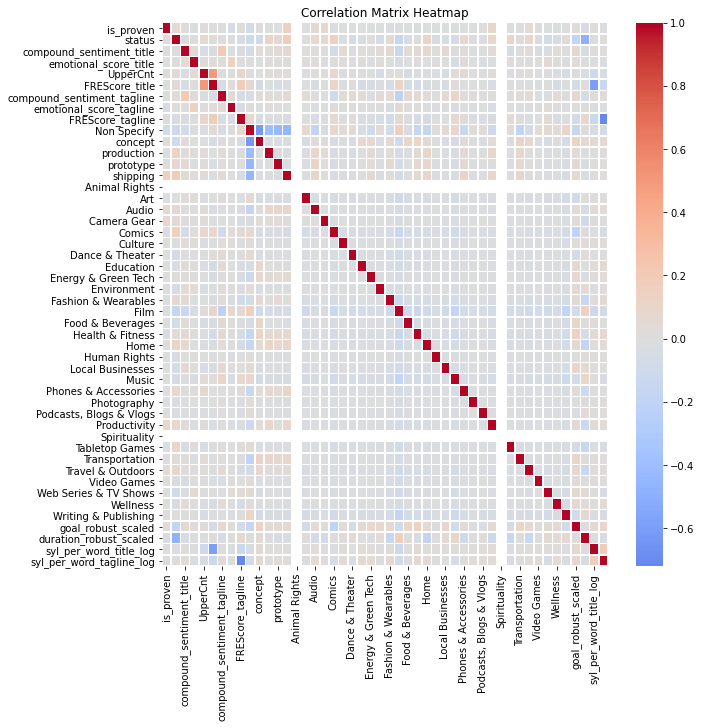

In [270]:
# Create the correlation matrix
correlation_matrix = filtered_df2020.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

## 7.4 Model in 2020

### 7.4.1 Split data

In [271]:
up_df2020

,is_proven,status,compound_sentiment_title,emotional_score_title,UpperCnt,FREScore_title,compound_sentiment_tagline,emotional_score_tagline,FREScore_tagline,Non Specify,...,Transportation,Travel & Outdoors,Video Games,Web Series & TV Shows,Wellness,Writing & Publishing,goal_robust_scaled,duration_robust_scaled,syl_per_word_title_log,syl_per_word_tagline_log
0,False,0,0.0000,0.0,0,33.575000,0.0000,1.0,17.382143,1,...,0,0,0,0,0,0,-0.703355,-0.485427,0.810930,0.632523
56,False,0,0.0000,0.0,0,66.400000,0.0000,1.0,89.896429,1,...,0,0,0,0,0,0,-0.045729,-0.485427,0.405465,0.313658
118,False,0,0.0000,0.0,0,-48.995000,0.0000,0.0,87.945000,1,...,0,0,0,0,0,0,-0.490510,-0.485427,0.693147,0.133531
584,False,0,0.0000,1.0,2,139.325000,0.8860,1.0,44.970000,1,...,0,0,0,0,0,0,-0.490510,-0.485427,0.223144,0.405465
667,False,0,0.4939,1.0,0,30.530000,0.0000,1.0,29.515000,1,...,0,0,0,0,0,0,-0.854371,-1.584963,0.538997,0.510826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17332,False,1,0.4019,0.0,0,71.815000,0.4404,1.0,30.947692,1,...,0,0,0,0,0,0,0.144531,0.514573,0.223144,0.387766
15073,False,1,0.0000,1.0,4,200.745000,0.4069,1.0,72.615455,1,...,0,0,0,0,0,0,-1.286616,-0.485427,0.451985,0.606136
16309,False,1,0.0000,1.0,1,103.044286,0.0000,1.0,41.851818,1,...,0,0,0,0,0,0,-0.484416,-1.070389,0.405465,0.510826
54686,False,1,0.0000,0.0,0,45.645000,0.7717,1.0,35.945000,0,...,1,0,0,0,0,0,0.272217,0.514573,0.223144,0.479573


### 7.4.2 Logistic Regression

In [272]:
#Set up Table
X = up_df2020.drop('status', axis=1)  # Features (all columns except the target)
y = up_df2020['status']  # Binary target variable

# Split the data into 70% training and 30% testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [273]:

# Initialize the logistic regression model
logreg = LogisticRegression()

# Train the model using the training data
logreg.fit(X_train, y_train)

# Generate predictions
y_pred = logreg.predict(X_test)

In [274]:
print("Length of y_test:", len(y_test))
print("Length of y_test:", len(y_train))
print("Length of y_test:", len(X_test))
print("Length of y_test:", len(X_train))
print("Length of y_test:", len(y_pred))


Length of y_test: 3660
Length of y_test: 8538
Length of y_test: 3660
Length of y_test: 8538
Length of y_test: 3660


In [275]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels respectively

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate classification report with macro and weighted averages
report_dict = classification_report(y_test, y_pred, target_names=["0", "1"], output_dict=True)

# Create a DataFrame from the classification report dictionary
report_df = pd.DataFrame(report_dict).transpose()

# Display the classification report DataFrame
print("Classification Report:")
print(report_df)

'''# print
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)'''


# Display the confusion matrix as well
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score      support
0              0.720839  0.794941  0.756079  1858.000000
1              0.763501  0.682575  0.720774  1802.000000
accuracy       0.739617  0.739617  0.739617     0.739617
macro avg      0.742170  0.738758  0.738426  3660.000000
weighted avg   0.741844  0.739617  0.738696  3660.000000
Confusion Matrix:
[[1477  381]
 [ 572 1230]]


In [276]:
'''y_train_pred = logreg.predict(X_train)

# Assuming you have true labels (y_train) and predicted labels (y_train_pred) from your model
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)



print("Training Set Performance:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print("ROC-AUC Score:", roc_auc_train)
print("Confusion Matrix:")
print("Classification Matrix:")
print(conf_matrix_train)

# Calculate classification report with macro and weighted averages
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"], output_dict=True)'''

'y_train_pred = logreg.predict(X_train)\n\n# Assuming you have true labels (y_train) and predicted labels (y_train_pred) from your model\naccuracy_train = accuracy_score(y_train, y_train_pred)\nprecision_train = precision_score(y_train, y_train_pred)\nrecall_train = recall_score(y_train, y_train_pred)\nf1_train = f1_score(y_train, y_train_pred)\nroc_auc_train = roc_auc_score(y_train, y_train_pred)\nconf_matrix_train = confusion_matrix(y_train, y_train_pred)\n\n\n\nprint("Training Set Performance:")\nprint("Accuracy:", accuracy_train)\nprint("Precision:", precision_train)\nprint("Recall:", recall_train)\nprint("F1 Score:", f1_train)\nprint("ROC-AUC Score:", roc_auc_train)\nprint("Confusion Matrix:")\nprint("Classification Matrix:")\nprint(conf_matrix_train)\n\n# Calculate classification report with macro and weighted averages\nreport = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"], output_dict=True)'

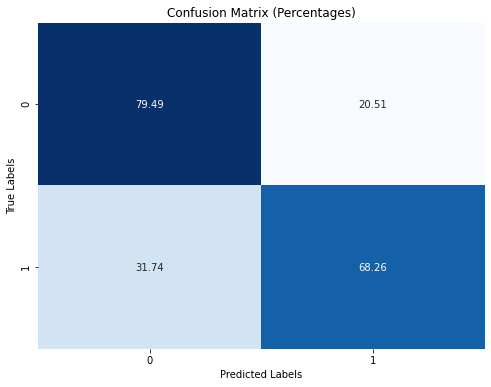

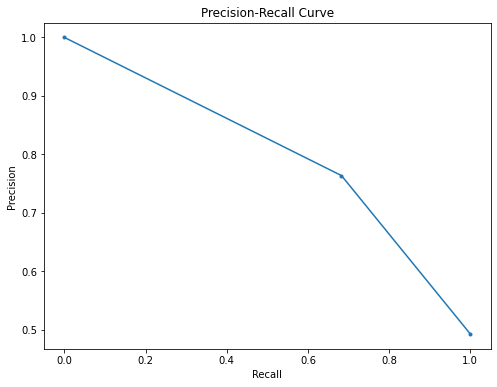

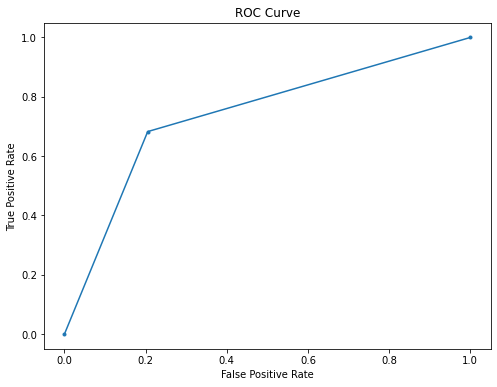

In [277]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve

# Assuming you have calculated the confusion matrix earlier
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to percentages
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Percentages)")
plt.show()

# Plot precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


### 7.4.3 Random Forrest

In [278]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [279]:
# Create a Random Forest model
random_forest1 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth= 30)

# Train the model
random_forest1.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8934426229508197


In [280]:
# Calculate classification report with macro and weighted averages
report_dict = classification_report(y_test, y_pred, target_names=["0", "1"], output_dict=True)

# Create a DataFrame from the classification report dictionary
report_df = pd.DataFrame(report_dict).transpose()

# Display the classification report DataFrame
print("Classification Report:")
print(report_df)

# Display the confusion matrix as well
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score      support
0              0.899347  0.889666  0.894481  1858.000000
1              0.887486  0.897336  0.892384  1802.000000
accuracy       0.893443  0.893443  0.893443     0.893443
macro avg      0.893417  0.893501  0.893432  3660.000000
weighted avg   0.893507  0.893443  0.893448  3660.000000
Confusion Matrix:
[[1653  205]
 [ 185 1617]]


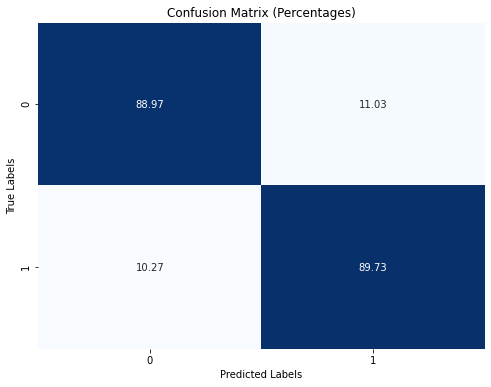

In [281]:
# Convert confusion matrix to percentages
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Percentages)")
plt.show()

In [282]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [283]:
import shap

# DF, based on which importance is checked
X_importance = X_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(random_forest1)
shap_values = explainer.shap_values(X_importance)


In [284]:
import shap
import numpy as np
import pandas as pd

# Assuming you have already calculated SHAP values (shap_values) and have a dataset X_importance
# Replace shap_values and X_importance with your actual data

# Reshape your SHAP values to (n_samples, n_features)
shap_values_2d = shap_values[0]  # Assuming you want to analyze the first set of SHAP values if you have multiple sets

# Calculate the mean absolute SHAP value for each feature
mean_shap_values = np.abs(shap_values_2d).mean(axis=0)

# Create a DataFrame to store the summary
shap_summary_df = pd.DataFrame({
    'Feature': X_importance.columns,
    'Mean SHAP Value': mean_shap_values
})

# Sort the features by their mean SHAP value in descending order
shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

# Display the summary table
print(shap_summary_df)


                       Feature  Mean SHAP Value
44      duration_robust_scaled         0.123179
43          goal_robust_scaled         0.072816
24                        Film         0.028809
17                      Comics         0.026822
3                     UpperCnt         0.017027
4               FREScore_title         0.015130
8                  Non Specify         0.014588
12                    shipping         0.014555
7             FREScore_tagline         0.013683
46    syl_per_word_tagline_log         0.012250
5   compound_sentiment_tagline         0.012152
45      syl_per_word_title_log         0.011443
10                  production         0.009968
9                      concept         0.009878
42        Writing & Publishing         0.009084
1     compound_sentiment_title         0.007406
2        emotional_score_title         0.007077
30                       Music         0.006432
27                        Home         0.005910
38           Travel & Outdoors         0

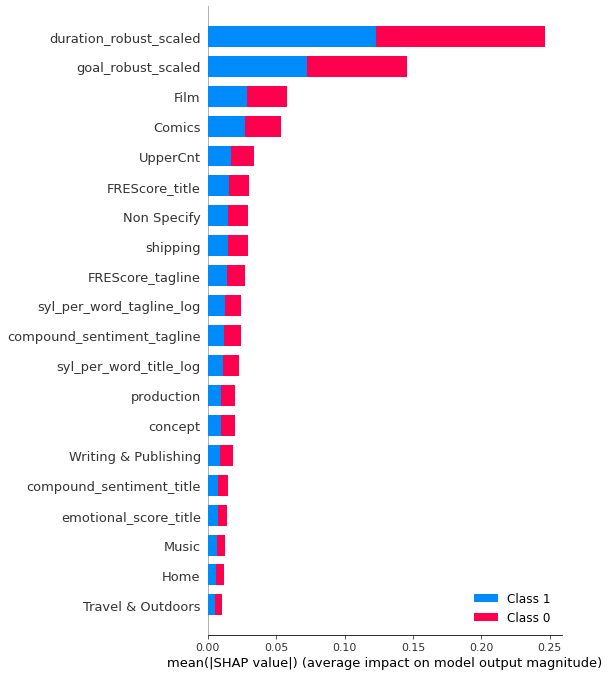

In [285]:
# Create a summary bar plot
shap.summary_plot(shap_values, X_importance, show=True)


### 7.4.4 XGBoost


In [286]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [287]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Create an XGBoost model
xgb_model = XGBClassifier(n_estimators=500, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8786885245901639


In [288]:
# Calculate classification report with macro and weighted averages
report_dict = classification_report(y_test, y_pred, target_names=["0", "1"], output_dict=True)

# Create a DataFrame from the classification report dictionary
report_df = pd.DataFrame(report_dict).transpose()

# Display the classification report DataFrame
print("Classification Report:")
print(report_df)

# Display the confusion matrix as well
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score      support
0              0.896300  0.860603  0.878089  1858.000000
1              0.861940  0.897336  0.879282  1802.000000
accuracy       0.878689  0.878689  0.878689     0.878689
macro avg      0.879120  0.878970  0.878686  3660.000000
weighted avg   0.879383  0.878689  0.878676  3660.000000
Confusion Matrix:
[[1599  259]
 [ 185 1617]]


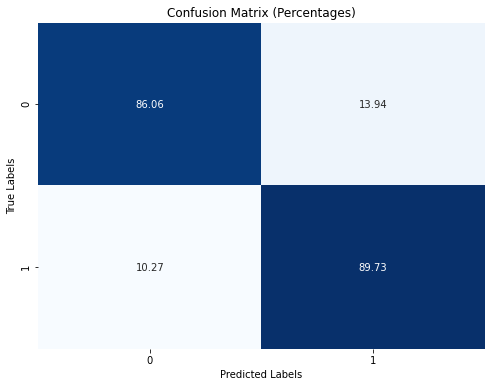

In [289]:
# Convert confusion matrix to percentages
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Percentages)")
plt.show()

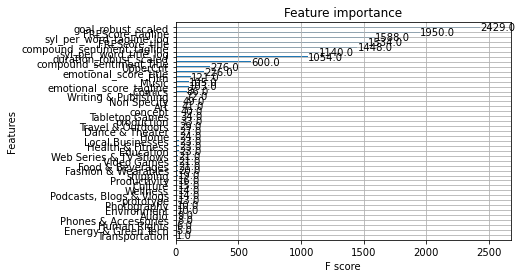

In [290]:
from xgboost import plot_importance


# Plot feature importance
plot_importance(xgb_model)
plt.show()


## 7.5 Model in 2021

### 7.5.1 Spliting data

In [291]:
# Drop Column
filtered_df2021.drop('open_year', axis=1, inplace=True)
up_df2021.drop('open_year', axis=1, inplace=True)

In [292]:
up_df2021

,is_proven,status,compound_sentiment_title,emotional_score_title,UpperCnt,FREScore_title,compound_sentiment_tagline,emotional_score_tagline,FREScore_tagline,Non Specify,...,Transportation,Travel & Outdoors,Video Games,Web Series & TV Shows,Wellness,Writing & Publishing,goal_robust_scaled,duration_robust_scaled,syl_per_word_title_log,syl_per_word_tagline_log
17872,False,0,0.0000,0.0,0,54.725000,0.3612,1.0,43.963077,1,...,0,1,0,0,0,0,-1.431077,-0.485427,0.693147,0.424883
17878,False,0,-0.2960,1.0,2,90.958571,-0.6486,1.0,53.639286,1,...,0,0,0,0,0,0,-1.431077,-1.584963,0.223144,0.336472
17893,False,0,0.4019,0.0,0,90.958571,0.0000,1.0,73.845000,0,...,0,0,0,0,0,0,-0.339494,-1.584963,0.133531,0.356675
17900,False,0,0.0000,0.0,0,6.390000,0.4767,1.0,80.686842,1,...,0,0,0,0,0,0,2.195084,0.514573,0.693147,0.191055
17902,False,0,-0.3400,1.0,0,66.400000,0.2942,1.0,84.450000,1,...,0,0,0,0,0,0,-1.067216,-0.485427,0.470004,0.223144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54232,False,1,0.0000,1.0,1,30.530000,0.6486,1.0,4.916923,1,...,0,0,0,0,0,0,-1.180290,-0.438121,0.628609,0.624154
20992,False,1,0.0000,0.0,0,120.205000,0.3182,1.0,55.215294,1,...,0,0,0,0,0,0,-0.320169,-0.392317,0.000000,0.387766
64358,False,1,-0.3400,1.0,1,103.540000,0.0000,0.0,120.110714,0,...,0,0,0,0,0,0,-0.143497,0.514573,0.367725,0.510826
59744,False,1,0.0000,1.0,0,31.545000,0.4215,1.0,25.455000,1,...,0,0,0,0,0,0,-0.151905,-5.392317,0.538997,0.336472


In [293]:
#Set up Table
X = up_df2021.drop('status', axis=1)  # Features (all columns except the target)
y = up_df2021['status']  # Binary target variable

# Split the data into 70% training and 30% testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 7.5.2 Logistic Regression

In [294]:

# Initialize the logistic regression model
logreg = LogisticRegression()

# Train the model using the training data
logreg.fit(X_train, y_train)

# Generate predictions
y_pred = logreg.predict(X_test)

In [295]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels respectively

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate classification report with macro and weighted averages
report_dict = classification_report(y_test, y_pred, target_names=["0", "1"], output_dict=True)

# Create a DataFrame from the classification report dictionary
report_df = pd.DataFrame(report_dict).transpose()

# Display the classification report DataFrame
print("Classification Report:")
print(report_df)

# Display the confusion matrix as well
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score      support
0              0.690559  0.812339  0.746515  1945.000000
1              0.760341  0.620579  0.683387  1866.000000
accuracy       0.718447  0.718447  0.718447     0.718447
macro avg      0.725450  0.716459  0.714951  3811.000000
weighted avg   0.724727  0.718447  0.715606  3811.000000
Confusion Matrix:
[[1580  365]
 [ 708 1158]]


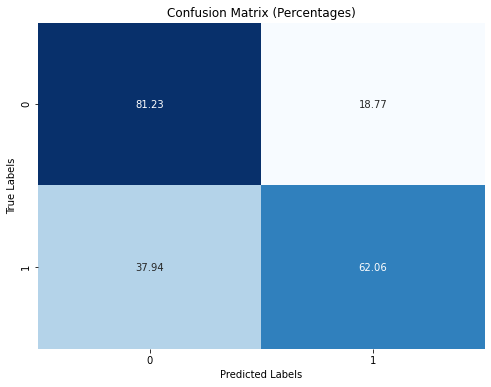

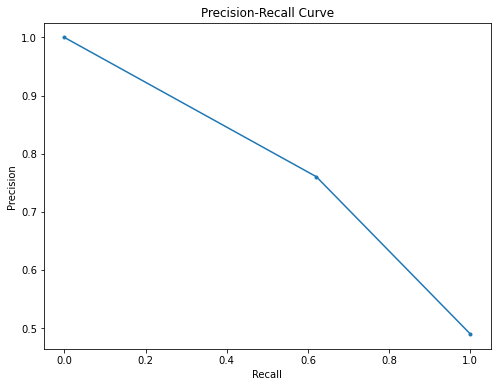

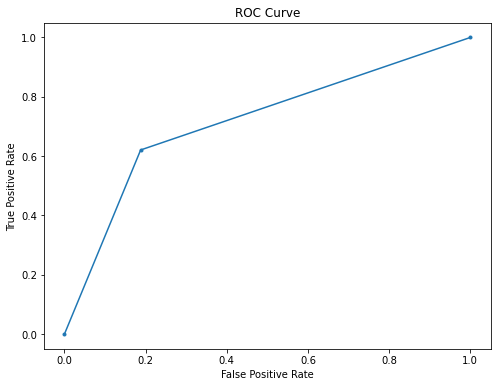

In [296]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve

# Assuming you have calculated the confusion matrix earlier
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to percentages
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Percentages)")
plt.show()

# Plot precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


### 7.5.2 Random Forest

In [297]:
# Create a Random Forest model
random_forest2 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth= 30)

# Train the model
random_forest2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest2.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.896877459984256


In [298]:
# Calculate classification report with macro and weighted averages
report_dict = classification_report(y_test, y_pred, target_names=["0", "1"], output_dict=True)

# Create a DataFrame from the classification report dictionary
report_df = pd.DataFrame(report_dict).transpose()

# Display the classification report DataFrame
print("Classification Report:")
print(report_df)

# Display the confusion matrix as well
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score      support
0              0.887612  0.913625  0.900431  1945.000000
1              0.907131  0.879421  0.893061  1866.000000
accuracy       0.896877  0.896877  0.896877     0.896877
macro avg      0.897372  0.896523  0.896746  3811.000000
weighted avg   0.897169  0.896877  0.896822  3811.000000
Confusion Matrix:
[[1777  168]
 [ 225 1641]]


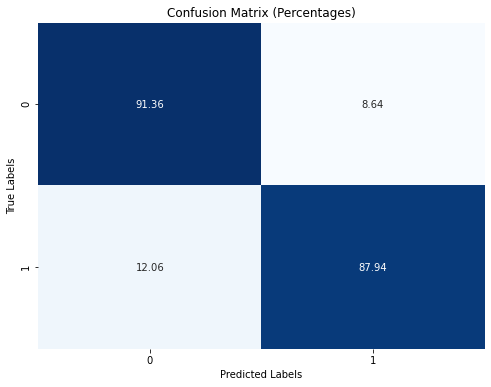

In [299]:
# Convert confusion matrix to percentages
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Percentages)")
plt.show()

In [300]:
import shap

# DF, based on which importance is checked
X_importance = X_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(random_forest2)
shap_values = explainer.shap_values(X_importance)


In [301]:
import shap
import numpy as np
import pandas as pd

# Assuming you have already calculated SHAP values (shap_values) and have a dataset X_importance
# Replace shap_values and X_importance with your actual data

# Reshape your SHAP values to (n_samples, n_features)
shap_values_2d = shap_values[0]  # Assuming you want to analyze the first set of SHAP values if you have multiple sets

# Calculate the mean absolute SHAP value for each feature
mean_shap_values = np.abs(shap_values_2d).mean(axis=0)

# Create a DataFrame to store the summary
shap_summary_df = pd.DataFrame({
    'Feature': X_importance.columns,
    'Mean SHAP Value': mean_shap_values
})

# Sort the features by their mean SHAP value in descending order
shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

# Display the summary table
print(shap_summary_df)


                       Feature  Mean SHAP Value
44      duration_robust_scaled         0.115828
43          goal_robust_scaled         0.060200
24                        Film         0.046193
17                      Comics         0.029167
45      syl_per_word_title_log         0.016825
7             FREScore_tagline         0.016363
4               FREScore_title         0.015297
46    syl_per_word_tagline_log         0.014377
8                  Non Specify         0.014284
5   compound_sentiment_tagline         0.013481
3                     UpperCnt         0.010350
12                    shipping         0.009088
2        emotional_score_title         0.008868
40       Web Series & TV Shows         0.007527
1     compound_sentiment_title         0.007480
27                        Home         0.006657
9                      concept         0.005168
42        Writing & Publishing         0.004836
11                   prototype         0.004812
6      emotional_score_tagline         0

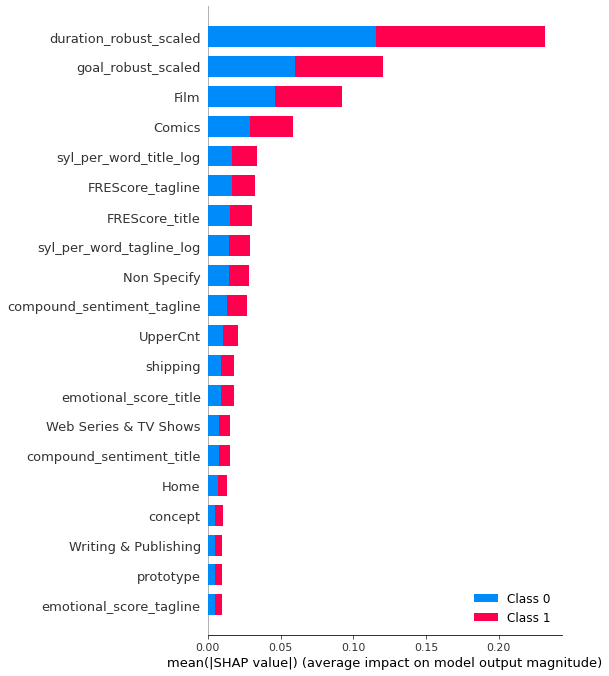

In [302]:
# Create a summary bar plot
shap.summary_plot(shap_values, X_importance, show=True)


### 7.5.3 XGBoost

In [303]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Create an XGBoost model
xgb_model = XGBClassifier(n_estimators=500, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8785095775387037


In [304]:
# Calculate classification report with macro and weighted averages
report_dict = classification_report(y_test, y_pred, target_names=["0", "1"], output_dict=True)

# Create a DataFrame from the classification report dictionary
report_df = pd.DataFrame(report_dict).transpose()

# Display the classification report DataFrame
print("Classification Report:")
print(report_df)

# Display the confusion matrix as well
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score     support
0              0.895833  0.862211  0.878701  1945.00000
1              0.861784  0.895498  0.878318  1866.00000
accuracy       0.878510  0.878510  0.878510     0.87851
macro avg      0.878809  0.878855  0.878509  3811.00000
weighted avg   0.879162  0.878510  0.878513  3811.00000
Confusion Matrix:
[[1677  268]
 [ 195 1671]]


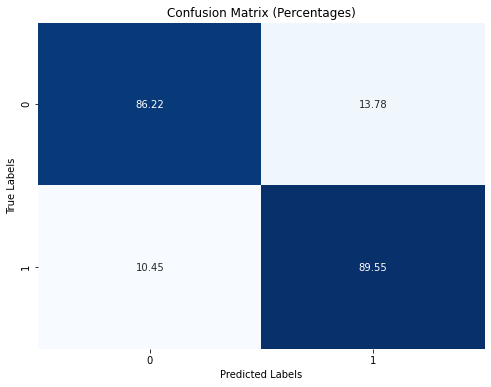

In [305]:
# Convert confusion matrix to percentages
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Percentages)")
plt.show()

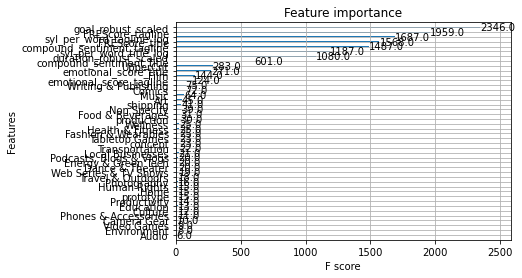

In [306]:
from xgboost import plot_importance


# Plot feature importance
plot_importance(xgb_model)
plt.show()


## 7.6 Model in 2022

### 7.6.1 Split Data

In [307]:
# Drop Column
filtered_df2022.drop('open_year', axis=1, inplace=True)
up_df2022.drop('open_year', axis=1, inplace=True)

In [308]:
up_df2022

,is_proven,status,compound_sentiment_title,emotional_score_title,UpperCnt,FREScore_title,compound_sentiment_tagline,emotional_score_tagline,FREScore_tagline,Non Specify,...,Transportation,Travel & Outdoors,Video Games,Web Series & TV Shows,Wellness,Writing & Publishing,goal_robust_scaled,duration_robust_scaled,syl_per_word_title_log,syl_per_word_tagline_log
23951,False,0,0.0,0.0,0,82.390000,0.5093,1.0,80.097647,1,...,0,0,0,0,0,0,0.986364,0.099536,0.167054,0.167054
23956,False,0,0.0,0.0,0,77.905000,0.0000,1.0,82.390000,1,...,0,0,0,0,0,0,-1.431077,-5.392317,0.405465,0.262364
23957,False,0,0.0,0.0,0,90.990000,0.0000,1.0,53.655000,1,...,0,1,0,0,0,0,0.141504,-2.070389,0.223144,0.174353
23962,False,0,0.0,0.0,1,62.790000,0.1531,1.0,0.300000,1,...,0,1,0,0,0,0,-0.490510,-0.485427,0.847298,0.641854
23978,False,0,0.0,0.0,0,-78.210000,0.0000,1.0,56.978462,0,...,0,0,0,0,0,0,0.141504,-0.070389,0.693147,0.313658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,False,1,0.0,0.0,0,-47.980000,-0.4767,1.0,44.970000,1,...,0,0,0,0,0,0,-1.164261,0.251539,1.098612,0.385662
37659,False,1,0.0,0.0,0,78.872857,0.0000,0.0,63.695000,1,...,0,0,0,0,0,0,-0.544846,-2.070389,0.223144,0.300105
62517,False,1,0.0,0.0,1,134.080000,0.5095,0.0,102.045000,1,...,0,1,0,0,0,0,0.416995,-5.392317,0.287682,0.510826
41040,False,1,0.0,0.0,0,34.590000,0.4019,0.0,129.005000,1,...,0,0,0,0,0,0,-0.845906,0.514573,0.510826,0.087011


### 7.6.2 Logistic Regression

In [309]:
#Set up Table
X = up_df2022.drop('status', axis=1)  # Features (all columns except the target)
y = up_df2022['status']  # Binary target variable

# Split the data into 70% training and 30% testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [310]:
# Initialize the logistic regression model
logreg = LogisticRegression()

# Train the model using the training data
logreg.fit(X_train, y_train)

# Generate predictions
y_pred = logreg.predict(X_test)

In [311]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels respectively

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate classification report with macro and weighted averages
report_dict = classification_report(y_test, y_pred, target_names=["0", "1"], output_dict=True)

# Create a DataFrame from the classification report dictionary
report_df = pd.DataFrame(report_dict).transpose()

# Display the classification report DataFrame
print("Classification Report:")
print(report_df)

# Display the confusion matrix as well
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score      support
0              0.727273  0.777416  0.751509  1842.000000
1              0.749082  0.695060  0.721060  1761.000000
accuracy       0.737163  0.737163  0.737163     0.737163
macro avg      0.738177  0.736238  0.736285  3603.000000
weighted avg   0.737932  0.737163  0.736627  3603.000000
Confusion Matrix:
[[1432  410]
 [ 537 1224]]


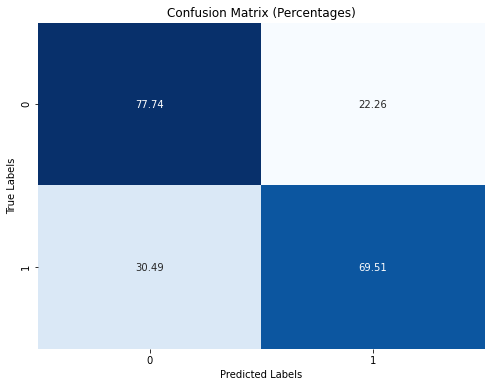

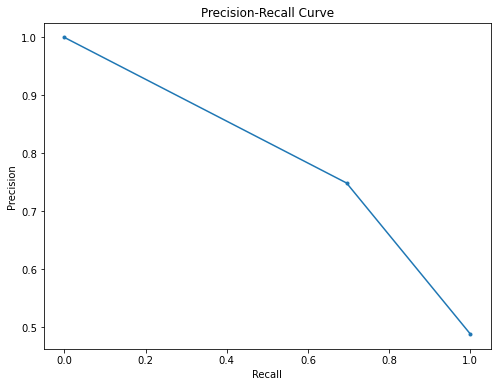

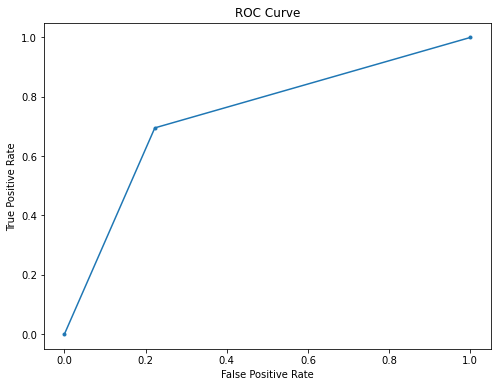

In [312]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve

# Assuming you have calculated the confusion matrix earlier
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to percentages
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Percentages)")
plt.show()

# Plot precision-recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


### 7.6.3 Random Forest

In [313]:
# Create a Random Forest model
random_forest3 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth = 30)

# Train the model
random_forest3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest3.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9275603663613655


In [314]:
# Calculate classification report with macro and weighted averages
report_dict = classification_report(y_test, y_pred, target_names=["0", "1"], output_dict=True)

# Create a DataFrame from the classification report dictionary
report_df = pd.DataFrame(report_dict).transpose()

# Display the classification report DataFrame
print("Classification Report:")
print(report_df)

# Display the confusion matrix as well
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score     support
0              0.951456  0.904452  0.927359  1842.00000
1              0.904968  0.951732  0.927761  1761.00000
accuracy       0.927560  0.927560  0.927560     0.92756
macro avg      0.928212  0.928092  0.927560  3603.00000
weighted avg   0.928735  0.927560  0.927555  3603.00000
Confusion Matrix:
[[1666  176]
 [  85 1676]]


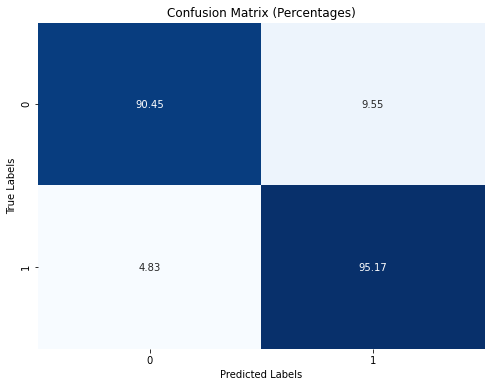

In [315]:
# Convert confusion matrix to percentages
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Percentages)")
plt.show()

In [316]:
import shap

# DF, based on which importance is checked
X_importance = X_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(random_forest3)
shap_values = explainer.shap_values(X_importance)


In [317]:
import shap
import numpy as np
import pandas as pd

# Assuming you have already calculated SHAP values (shap_values) and have a dataset X_importance
# Replace shap_values and X_importance with your actual data

# Reshape your SHAP values to (n_samples, n_features)
shap_values_2d = shap_values[0]  # Assuming you want to analyze the first set of SHAP values if you have multiple sets

# Calculate the mean absolute SHAP value for each feature
mean_shap_values = np.abs(shap_values_2d).mean(axis=0)

# Create a DataFrame to store the summary
shap_summary_df = pd.DataFrame({
    'Feature': X_importance.columns,
    'Mean SHAP Value': mean_shap_values
})

# Sort the features by their mean SHAP value in descending order
shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

# Display the summary table
print(shap_summary_df)


                       Feature  Mean SHAP Value
44      duration_robust_scaled         0.102809
43          goal_robust_scaled         0.071645
24                        Film         0.065971
17                      Comics         0.027157
3                     UpperCnt         0.021978
45      syl_per_word_title_log         0.018646
8                  Non Specify         0.015543
46    syl_per_word_tagline_log         0.015518
7             FREScore_tagline         0.015011
5   compound_sentiment_tagline         0.014693
4               FREScore_title         0.014463
27                        Home         0.013484
1     compound_sentiment_title         0.011334
2        emotional_score_title         0.009030
36              Tabletop Games         0.008539
12                    shipping         0.008329
34                Productivity         0.007173
30                       Music         0.006412
10                  production         0.006378
6      emotional_score_tagline         0

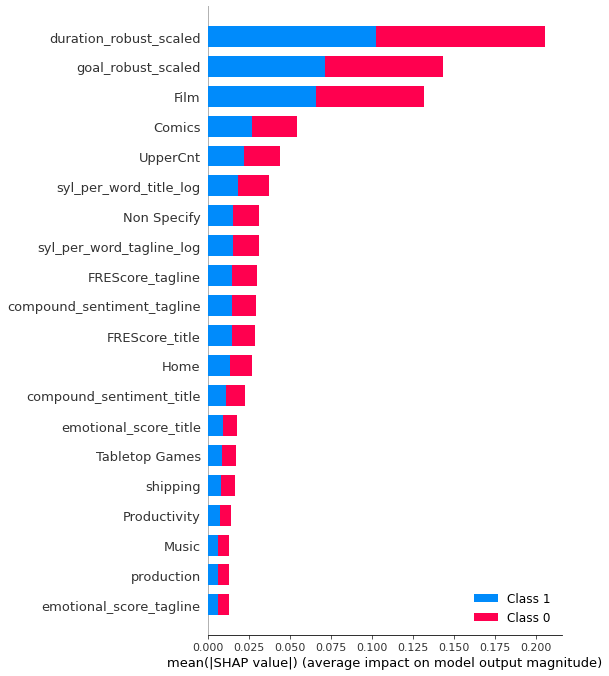

In [318]:
# Create a summary bar plot
shap.summary_plot(shap_values, X_importance, show=True)


### 7.6.4 XGBoost

In [319]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Create an XGBoost model
xgb_model = XGBClassifier(n_estimators=500, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9111851235081876


In [320]:
# Calculate classification report with macro and weighted averages
report_dict = classification_report(y_test, y_pred, target_names=["0", "1"], output_dict=True)

# Create a DataFrame from the classification report dictionary
report_df = pd.DataFrame(report_dict).transpose()

# Display the classification report DataFrame
print("Classification Report:")
print(report_df)

# Display the confusion matrix as well
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report:
              precision    recall  f1-score      support
0              0.951364  0.870793  0.909297  1842.000000
1              0.875848  0.953436  0.912996  1761.000000
accuracy       0.911185  0.911185  0.911185     0.911185
macro avg      0.913606  0.912114  0.911147  3603.000000
weighted avg   0.914455  0.911185  0.911105  3603.000000
Confusion Matrix:
[[1604  238]
 [  82 1679]]


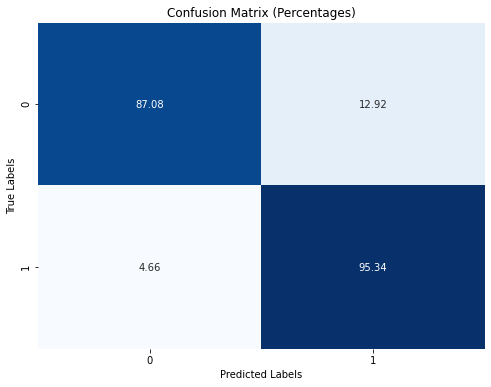

In [321]:
# Convert confusion matrix to percentages
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Percentages)")
plt.show()